In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

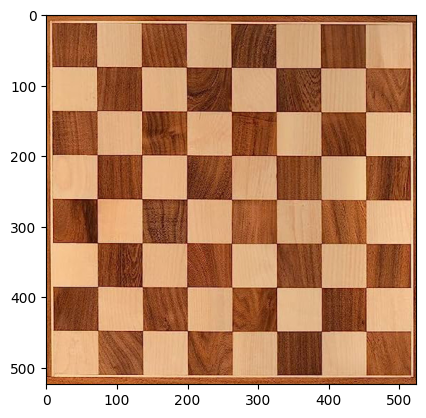

In [9]:
tablero = cv2.imread('../resources/img/tablero.jpg')
tablero = cv2.cvtColor(tablero, cv2.COLOR_BGR2RGB)
plt.imshow(tablero)

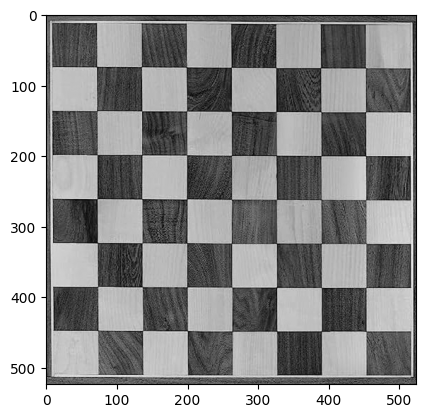

In [11]:
tablero_grey = cv2.cvtColor(tablero, cv2.COLOR_BGR2GRAY)
plt.imshow(tablero_grey, cmap = 'grey')

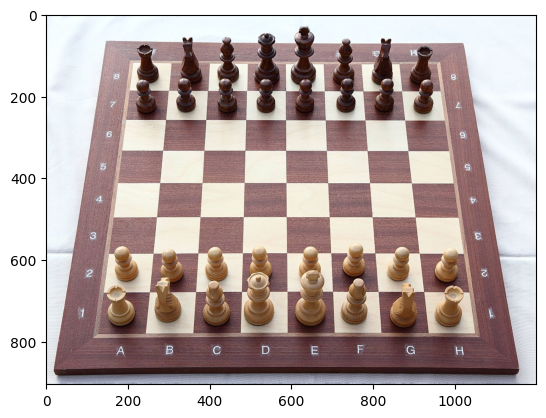

In [12]:
tablero_real = cv2.imread('../resources/img/ajedrez_real.jpg')
tablero_real = cv2.cvtColor(tablero_real, cv2.COLOR_BGR2RGB)
plt.imshow(tablero_real)

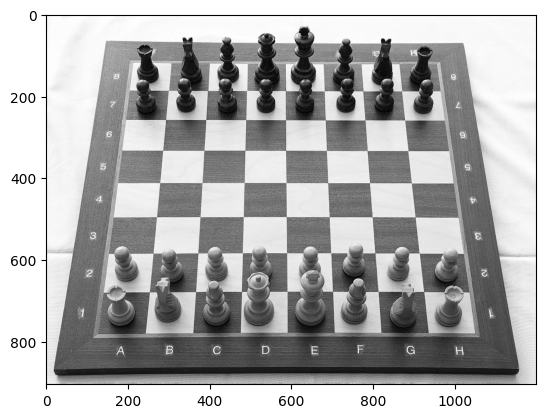

In [13]:
tablero_real_grey = cv2.cvtColor(tablero_real, cv2.COLOR_BGR2GRAY)
plt.imshow(tablero_real_grey, cmap = 'grey')

# Harris Corner Detection (1988)
## Convertimos a float nuestro tablero para que trabaje mejor el algoritmo de detección de esquinas.

In [14]:
tablero_grey_float = np.float32(tablero_grey)
tablero_grey_float

array([[ 95., 106., 108., ...,  52.,  68.,  60.],
       [ 93.,  98.,  96., ...,  39.,  49.,  46.],
       [ 82.,  82.,  78., ...,  66.,  70.,  72.],
       ...,
       [ 74., 110., 119., ...,  76., 106.,  80.],
       [ 84.,  91.,  71., ..., 102., 104.,  64.],
       [106., 121.,  97., ...,  79.,  51.,  88.]],
      shape=(524, 525), dtype=float32)

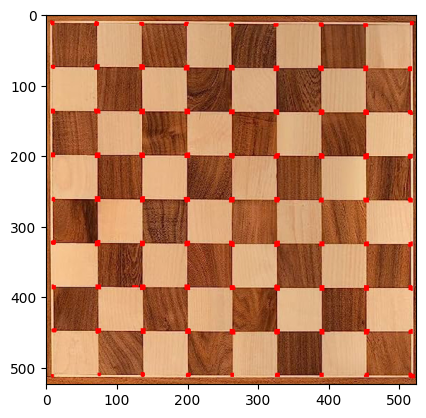

In [16]:
dst = cv2.cornerHarris(src = tablero_grey_float, blockSize = 5, ksize = 3, k = 0.04)
dst = cv2.dilate(dst, None)
tablero[dst>0.1 * dst.max()] = [255, 0, 0]
plt.imshow(tablero)

In [17]:
tablero_real_grey_float = np.float32(tablero_real_grey)
tablero_real_grey_float

array([[246., 246., 246., ..., 252., 252., 252.],
       [246., 246., 246., ..., 252., 252., 252.],
       [246., 246., 246., ..., 252., 252., 252.],
       ...,
       [229., 229., 233., ..., 237., 238., 230.],
       [228., 229., 233., ..., 234., 237., 226.],
       [229., 227., 229., ..., 236., 237., 230.]],
      shape=(905, 1200), dtype=float32)

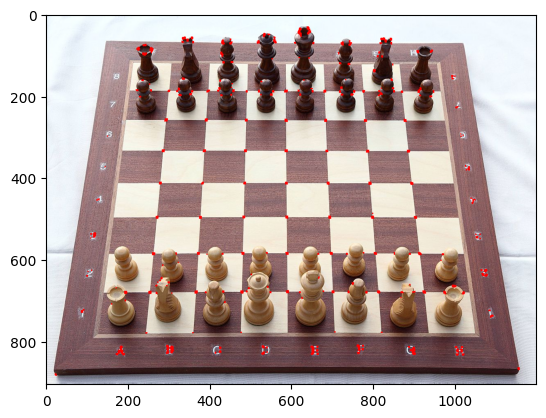

In [18]:
dst = cv2.cornerHarris(src = tablero_real_grey_float, blockSize = 5, ksize = 3, k = 0.04)
dst = cv2.dilate(dst, None)
tablero_real[dst>0.1 * dst.max()] = [255, 0, 0]
plt.imshow(tablero_real)

# Shi-Tomasi Croner Detection (1994)
Basado en el paper Good Features to Track
- Da mejores Resultados

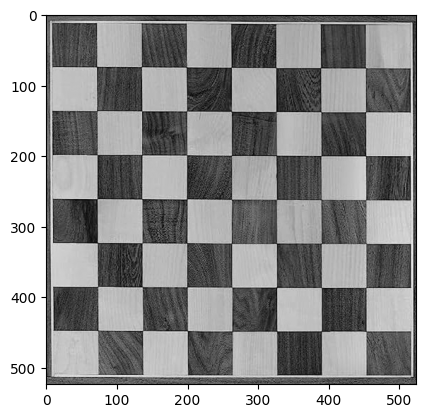

In [39]:
tablero = cv2.imread('../resources/img/tablero.jpg')
tablero = cv2.cvtColor(tablero, cv2.COLOR_BGR2RGB)

tablero_grey = cv2.cvtColor(tablero, cv2.COLOR_BGR2GRAY)
plt.imshow(tablero_grey, cmap = 'grey')

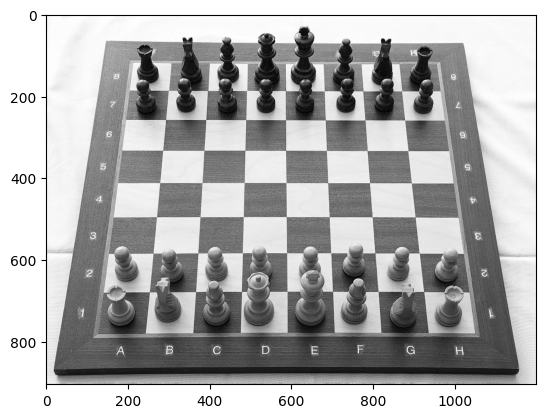

In [45]:
tablero_real = cv2.imread('../resources/img/ajedrez_real.jpg')
tablero_real = cv2.cvtColor(tablero_real, cv2.COLOR_BGR2RGB)

tablero_real_grey = cv2.cvtColor(tablero_real, cv2.COLOR_BGR2GRAY)
plt.imshow(tablero_real_grey, cmap = 'grey')

In [41]:
esquinas = cv2.goodFeaturesToTrack(tablero_grey, maxCorners = 81, qualityLevel = 0.01, minDistance = 10)
esquinas = np.intp(esquinas)

In [33]:
esquinas

array([[[515, 263]],

       [[ 10, 323]],

       [[515, 387]],

       [[ 10, 199]],

       [[515, 326]],

       [[515, 201]],

       [[135, 138]],

       [[ 72, 261]],

       [[  9, 137]],

       [[ 72, 385]]])

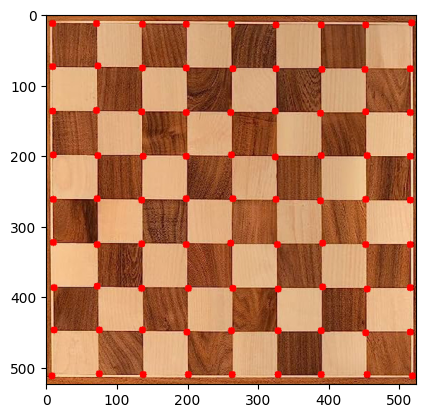

In [42]:
for i in esquinas:
    x, y = i.ravel()
    cv2.circle(tablero, (x, y), 5, 255, -1)
plt.imshow(tablero)

In [46]:
esquinas = cv2.goodFeaturesToTrack(tablero_real_grey, maxCorners = 200, qualityLevel = 0.01, minDistance = 10)
esquinas = np.intp(esquinas)

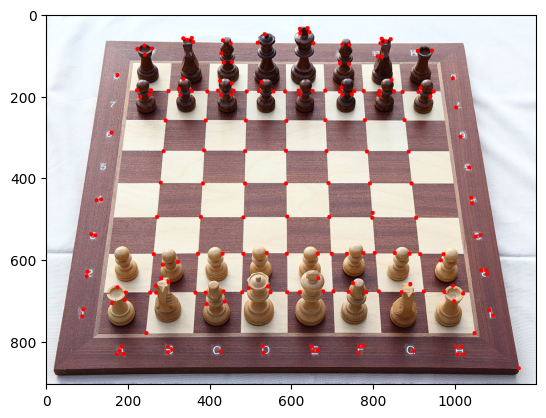

In [47]:
for i in esquinas:
    x, y = i.ravel()
    cv2.circle(tablero_real, (x, y), 5, 255, -1)
plt.imshow(tablero_real)